# Практика

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from statsmodels.stats.weightstats import _zconfint_generic
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [3]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
expon_rv = sts.expon()
sample = expon_rv.rvs(100)
sample

array([5.66750808e-01, 1.29792960e+00, 1.22234338e+00, 7.59275430e-01,
       6.99100706e-01, 4.07129338e-01, 4.18618806e+00, 1.36154357e+00,
       6.02354796e-01, 1.15715592e+00, 1.71348529e-01, 7.65661562e-01,
       6.39160727e-03, 2.90592300e+00, 6.54669746e-01, 2.67391769e+00,
       1.38486069e+00, 3.34936540e+00, 1.66518489e+00, 1.26596762e+00,
       3.50699141e+00, 5.39162764e-01, 2.30284613e+00, 3.66880024e-01,
       4.60487935e-01, 2.61475333e-01, 1.93933918e+00, 1.03263083e+00,
       1.07527531e+00, 4.57130267e-01, 6.22373375e-01, 2.51800415e+00,
       1.21634355e+00, 4.18949857e-01, 3.52883482e-01, 5.49838806e-01,
       8.08882137e-01, 1.94151899e+00, 4.09098600e+00, 2.52026789e-01,
       8.10717623e-01, 1.78505066e-01, 1.15998411e-01, 4.42767557e+00,
       1.51779228e+00, 8.07485922e-01, 2.12694629e-01, 4.99108693e-01,
       3.59947741e-01, 2.42628732e-01, 1.06377101e-01, 2.14474139e+00,
       3.94121608e-01, 1.37340988e+00, 1.46142317e-01, 2.00632051e+00,
      

In [4]:
sample.dtype

dtype('float64')

In [6]:
real_mean = expon_rv.mean() # настоящее среднее случайной величины
real_var = expon_rv.var() # настоящая дисперсия случайной величины
print(real_mean, real_var)

1.0 1.0


### Постройте гистограмму выборки и теоретическую плотность распределения

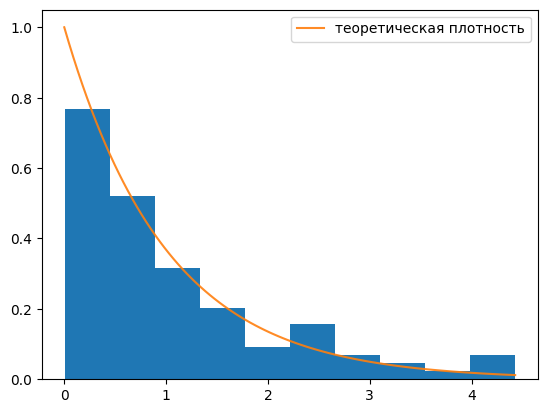

In [15]:
plt.hist(sample, density=True)
x = np.linspace(0,np.max(sample),100)
pdf = expon_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.9)
plt.legend()
plt.show()

In [12]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.0874502484418365
1.0372750654997167


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

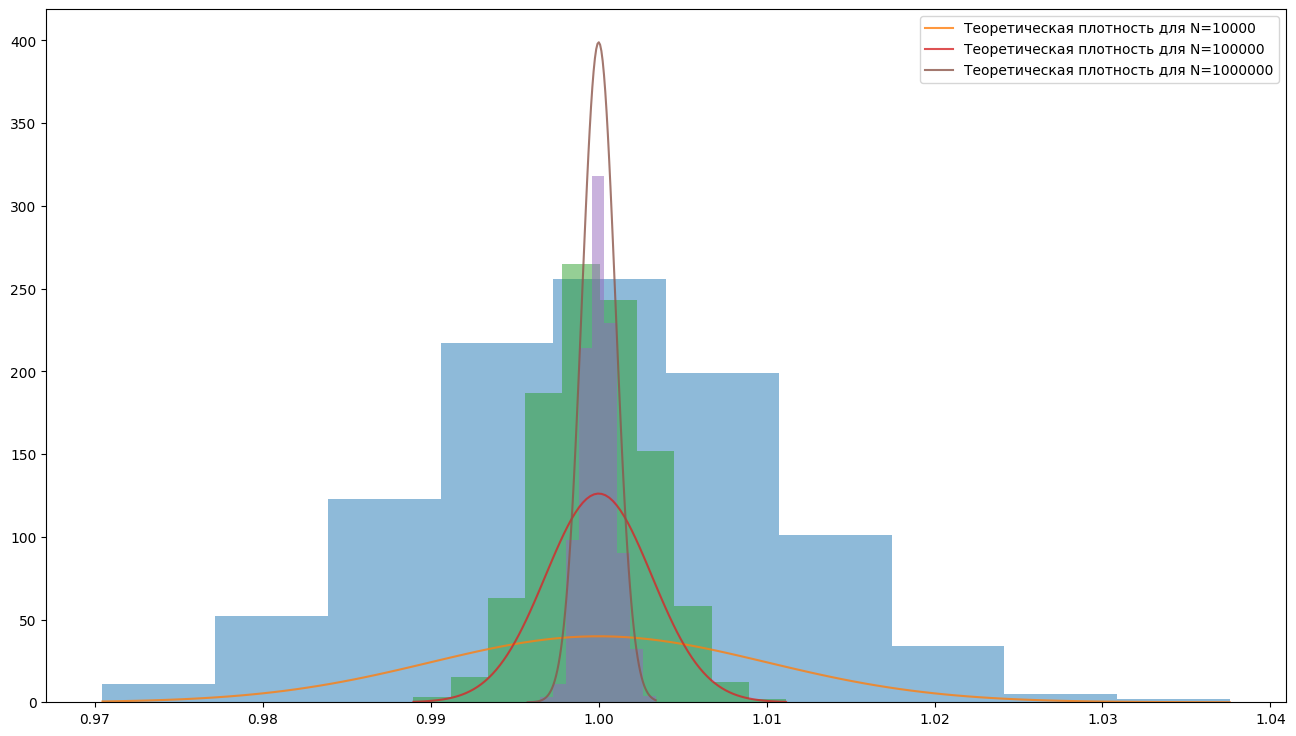

In [33]:
# генерируем выборки и вычисляем их средние
plt.figure(figsize=(16, 9))

for N in [10000, 100000, 1000000]:
    means = [np.mean(expon_rv.rvs(N)) for _ in range(1000)]
    plt.hist(means, alpha=0.5)

    # Теоретическое распределение выборочных средних
    norm_rv = sts.norm(loc=real_mean, scale=real_var / np.sqrt(N-1))
    x = np.linspace(min(means), max(means), 100)
    plt.plot(x, norm_rv.pdf(x), label=f'Теоретическая плотность для N={N}', alpha=0.8)
    plt.legend()
    plt.plot()


Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
# Думаю работает хорошо, т.к визуально график похож на нормальное распределение

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [34]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [36]:
churn_yes = df[df['churn'] == True]
churn_no = df[df['churn'] == False]

In [72]:
def confidence_interval(data):
    '''Функция для нахождения параметров, используемых для расчета доверительного интервала'''
    global z_alpha, mean, std
    N = len(data)
    z_alpha = sts.norm.ppf(0.95)
    mean = np.mean(data)
    std = data.std(ddof=1)/np.sqrt(N-1)


In [111]:
# Рассчитаем доверительный интервал для ушедших клиентов
confidence_interval(churn_yes['total day calls'])
ci = [mean - z_alpha * std, mean + z_alpha * std]
ci_zcg = _zconfint_generic(mean, std, alpha=0.05 , alternative='two-sided')
print(f'Доверительный интервал с использованием явной формулы:[{ci[0]}, {ci[1]}]')
print(f'Доверительный интервал с использованием _zconfint_generic:[{ci_zcg[0]:.14f}, {ci_zcg[1]:.14f}]')

Доверительный интервал с использованием явной формулы:[99.71843504673832, 102.95237240667784]
Доверительный интервал с использованием _zconfint_generic:[99.40866670589261, 103.26214074752355]


In [112]:
# Рассчитаем доверительный интервал для оставшихся клиентов
confidence_interval(churn_no['total day calls'])
ci = [mean - z_alpha * std, mean + z_alpha * std]
ci_zcg = _zconfint_generic(mean, std, alpha=0.05 , alternative='two-sided')
print(f'Доверительный интервал с использованием явной формулы:[{ci[0]}, {ci[1]}]')
print(f'Доверительный интервал с использованием _zconfint_generic:[{ci_zcg[0]:.14f}, {ci_zcg[1]:.14f}]')

Доверительный интервал с использованием явной формулы:[99.67295874472343, 100.89335704475026]
Доверительный интервал с использованием _zconfint_generic:[99.55606076109109, 101.01025502838260]
